# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,950 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies_train.csv to movies_train.csv


In [ ]:
# 데이터 불러오기
train=pd.read_csv("movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석 - 예시

### 5-1) 평균 관객수가 가장 많은 영화 장르

In [ ]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


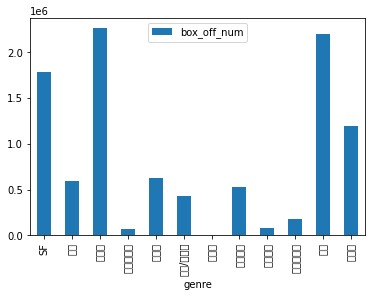

In [ ]:
train[['genre','box_off_num']].groupby('genre').mean().plot(kind='bar')

- 느와르가 가장 관객수가 많은 편이고 그 다음으로는 액션, SF, 코메디 순이다. 평균 관객수가 가장 낮은 영화 장르는 뮤지컬이다.

### 5-2) 영화를 가장 많이 제작하는 배급사 top5?

In [ ]:
train['distributor'].value_counts().sort_values(ascending=False)[:5]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
Name: distributor, dtype: int64

### 5-3) 영화 개봉 월에 따른 평균 관객수

In [ ]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

In [ ]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


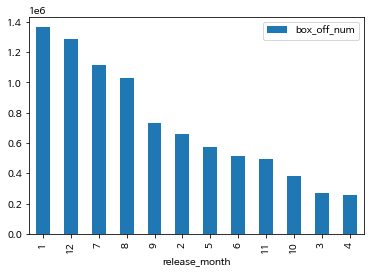

In [ ]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False).plot(kind='bar')

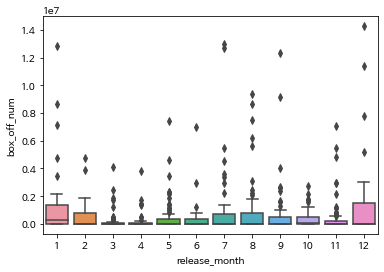

In [ ]:
baxplot=plt.subplots()
boxplot=sns.boxplot(x='release_month', y='box_off_num', data=train)

- 월별 평균을 따져봤을 때 1월, 12월, 7월, 8월이 상대적으로 높은 것으로 보아 방학때 개봉하는 영화가 관람객 수가 많다. 

## 6) 데이터 시각화 및 분석 - YB 3조
### 6-1) 제작에 참여한 스태프의 수와 상영시간의 상관관계

                 time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  \
time              1.0             0.3           0.3        0.6        0.1   
dir_prev_bfnum    0.3             1.0           0.1        0.3        0.1   
dir_prev_num      0.3             0.1           1.0        0.5        0.0   
num_staff         0.6             0.3           0.5        1.0        0.1   
num_actor         0.1             0.1           0.0        0.1        1.0   
box_off_num       0.4             0.3           0.3        0.5        0.1   
release_year     -0.1            -0.0           0.1       -0.0       -0.1   
release_month    -0.0             0.1           0.0       -0.0       -0.0   
release_weekday  -0.2            -0.2          -0.2       -0.3       -0.1   

                 box_off_num  release_year  release_month  release_weekday  
time                     0.4          -0.1           -0.0             -0.2  
dir_prev_bfnum           0.3          -0.0            0.1             -0.2 

Text(0, 0.5, 'number of staffs participated in')

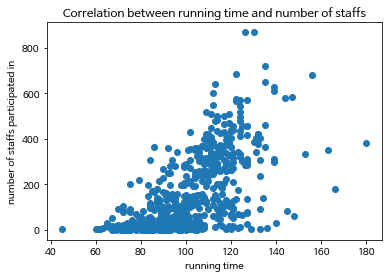

In [ ]:
print(train.corr())
scatter_plot = plt.figure()
ax = scatter_plot.add_subplot(1, 1, 1)
ax.scatter(train['time'], train['num_staff'])
ax.set_title('Correlation between running time and number of staffs')
ax.set_xlabel('running time')
ax.set_ylabel('number of staffs participated in')

- 각 수치형 변수들의 상관관계를 확인해 보았을 때 상영시간(분)과 스태프의 수가 강한 상관관계 (0.6)를 보이고 있으며 이를 산점도로도 파악할 수 있다.
- 제작에 참여한 스태프의 수와 영화의 상영시간(분)은 양의 상관관계를 보인다.

### 6-2) 특정 장르 내 영화들의 개봉 시기 - 공포영화 

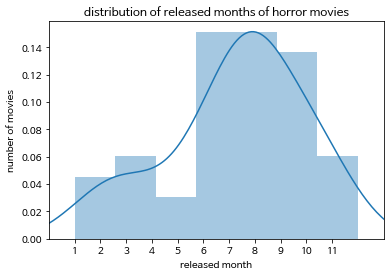

In [ ]:
ax = plt.subplots()
ax = sns.distplot(train[train.genre=='공포']['release_month'])
ax.set_title('distribution of released months of horror movies')
ax.set_xlabel('released month')
ax.set_ylabel('number of movies')
plt.xlim([0, 13])
ax.set_xticks(range(1,12)) 

- 공포영화는 여름 (6월~9월)에 많이 개봉된다.

## 6-3) 감독이 제작에 참여한 작품 수와 그 작품들의 평균 관객수의 관계
- 가설 : 어떤 감독이 제작에 참여한 작품 수가 많을수록 그 작품들의 평균 관객수도 증가하는 경향을 보일 것이다.

Text(0, 0.5, 'dir_prev_bfnum')

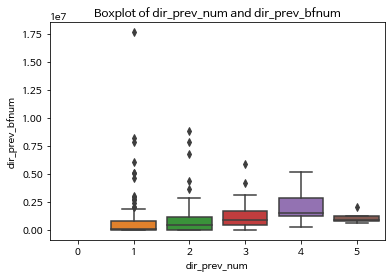

In [ ]:
train=train.astype({'dir_prev_num':'object'}) #int인 dir_prev_num을 object로 형변환

ax=plt.subplots()
ax=sns.boxplot(x='dir_prev_num',y='dir_prev_bfnum',data=train)
ax.set_title('Boxplot of dir_prev_num and dir_prev_bfnum')
ax.set_xlabel('dir_prev_num')
ax.set_ylabel('dir_prev_bfnum')

- 결론 : 작품 수가 1~4일때까지는 그 작품들의 평균 관객수가 증가하는 경향을 보였으나, 5일 때는 오히려 관객수가 감소하였다. 따라서 어떤 감독이 제작에 참여한 작품 수가 많다고 해서 그 작품들의 평균 관객수도 많은 것은 아니다. 하지만 dir_prev_num이 5인 자료가 4개밖에 없기 때문에 이런 결과가 나왔을 수도 있다.



## 6-4) 배급사 규모(대형, 중형, 소형)와 스텝 수의 관계
- 가설 : 대형 배급사에서 제작한 영화일수록 자본 투자를 많이 받기 유리해서 스텝 수가 많을 것이다.
- 배급사 규모에 따라 스텝 수가 어떻게 다른지 파악하기 위해 다음과 같은 과정을 수행한다.

Text(0, 0.5, 'num_staff')

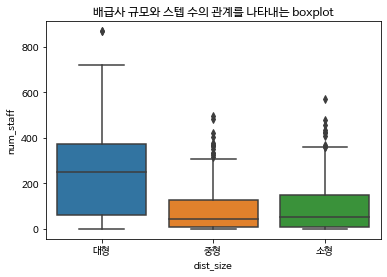

In [ ]:
# 배급사별 상영 영화 수를 dist_num_movie라는 열 이름으로 train dataframe에 추가
train['dist_num_movie'] = train.groupby(['distributor'])['distributor'].transform('count')
train.head()

# 상영 영화 수에 따라 배급사의 규모를 구별 
# dist_num_movie가 26 이상이면 대형 배급사, 6 이상 26 미만이면 중형 배급사, 6 미만이면 소형 배급사로 구분하여 dist_size라는 열 이름으로 train dataframe에 추가
condlist = [(train['dist_num_movie'] >= 26),(train['dist_num_movie'] < 26) & (train['dist_num_movie'] >= 6),(train['dist_num_movie'] < 6)]
choicelist = ['대형','중형','소형']
train['dist_size'] = np.select(condlist, choicelist)
train.head()

# 배급사 규모(대형, 중형, 소형)와 스텝 수의 관계
ax=plt.subplots()
ax=sns.boxplot(x='dist_size',y='num_staff',data=train,order=['대형','중형','소형'])
ax.set_title('배급사 규모와 스텝 수의 관계를 나타내는 boxplot')
ax.set_xlabel('dist_size')
ax.set_ylabel('num_staff')

- 결론 : 대형 배급사에서 제작하는 영화의 경우 중형, 소형 배급사보다 스텝 수가 월등히 많다. 이는 아마 대형 배급사일수록 자본을 투자받기 유리해서일 것이다. 반면 중형 배급사와 소형 배급사의 경우 스텝 수가 유의미한 차이를 보이지는 않았다.

## 6-5) 장르 별 스텝 수
- 액션이나 느와르와 같은 장르는 장르 특성 상 스탭이 많이 필요할 것이라고 생각했다. 뿐만 아니라 다른 장르에서도 장르 별로 필요한 스탭의 수에 차이가 있을 것이라 생각하여 분석을 진행하였다.

In [ ]:
# 장르 별 스탭 수 평균 확인
group_by_genre=train.groupby(by='genre')['num_staff'].mean()
group_by_genre

genre
SF       197.3
공포       176.4
느와르      311.1
다큐멘터리     17.8
드라마      164.5
멜로/로맨스   135.8
뮤지컬        2.2
미스터리     117.4
서스펜스     111.0
애니메이션     44.6
액션       337.5
코미디      209.1
Name: num_staff, dtype: float64

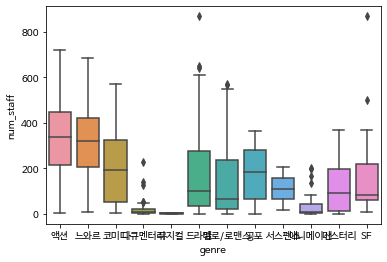

In [ ]:
# 장르 별 스탭 수 boxplot
genre_staff=plt.subplots()
genre_staff=sns.boxplot(x='genre', y='num_staff', data=train)

## 6-6) 해당 감독이 이전까지 제작한 영화의 관람객 수와 스텝 수의 관계
- 실적이 좋은 감독이면 영화 제작에 투자를 많이 받을 수 있어 그렇지 않은 영화보다 스탭 고용에 있어 자유로울 것이라고 생각했다.즉, 고용하는 스탭의 주에 제약이 비교적 적고, 필요한 만큼 많은 스탭을 고용할 수 있을것이라고 생각했다. 이에 이전까지 제작한 영화의 관람객 수와 스탭 수 사이의 관계를 파악하고자 scatter plot을 그려 보았다.

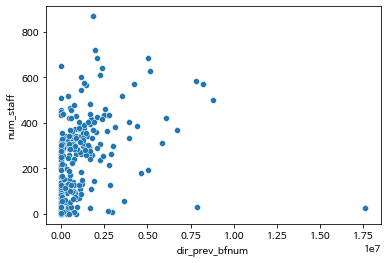

In [ ]:
genre_staff=plt.subplots()
genre_staff=sns.scatterplot(x='dir_prev_bfnum', y='num_staff', data=train)

  * 위의 그래프에서 이전의 영화에서 관객수가 매우 많은 outlier가 존재하는 것으로 보인다. 해당 outlier 때문에 scatterplot이 매우 넓은 범위의 관객수 축에 대해 그려진다. 따라서 대부분의 영화들에 해당하는 추이를 보기 위해 해당 outlier를 제외하고 x축의 범위를 조정하여 다시 scatter plot을 그려보았다.

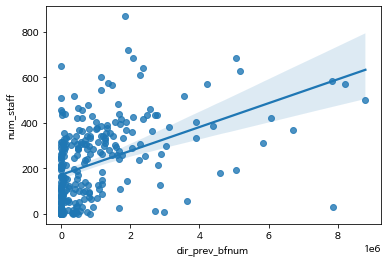

In [ ]:
remove_outlier=train[train['dir_prev_bfnum']<1.5*10**7]
remove_outlier.shape

genre_staff=plt.subplots()
genre_staff=sns.regplot(x='dir_prev_bfnum', y='num_staff', data=remove_outlier)

- outlier를 제외한 후 회귀선이 추가된 scatterplot을 그려 본 결과 해당 감독이 이전까지 제작한 관객수가 많을 수록 스탭 수가 많은 추세를 보인다. 다만, 감독이 이전까지 제작한 영화의 관객 수가 0인 경우가 많다는 점에 주의해야 할 것으로 보인다. 또한 이전 영화까지 관객수가 많더라도 해당 영화에서는 스탭 수가 적게 필요한 경우도 있을 것이기 때문에 이 결과를 무조건적으로 받아들여서는 안될 것으로 보인다.

## 6-7) 장르 별 주연배우 수
- 영화의 장르 별로 주연 배우 수가 다를 것으로 예상하였다.

In [ ]:
group_by_genre=train.groupby(by='genre')['num_actor'].mean()
group_by_genre

genre
SF       3.7
공포       3.9
느와르      3.6
다큐멘터리    3.3
드라마      3.6
멜로/로맨스   3.4
뮤지컬      2.8
미스터리     2.9
서스펜스     3.0
애니메이션    5.7
액션       3.6
코미디      4.7
Name: num_actor, dtype: float64

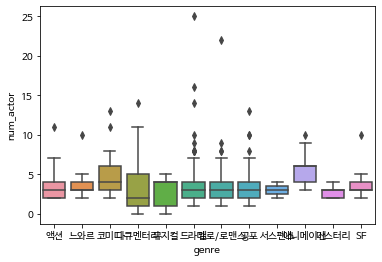

In [ ]:
#시각화
genre_staff=plt.subplots()
genre_staff=sns.boxplot(x='genre', y='num_actor', data=train)

- 다큐멘터리와 뮤지컬 장르의 경우 비교적 주연배우의 수가 적은 것으로 보인다. 애니메이션 장르의 경우 비교적 주연배우의 수가 많은 것으로 보인다.
- 드라마와 멜로/로맨스 장르에 outlier가 존재한다.

## 6-8) 장르 별 상영등급
- 공포 등의 특수성이 있는 장르의 경우 타 장르보다 상영 등급이 높은 영화의 비율이 높을 것이라고 예상했다. 이에 따라 장르 별로 상영등급에 대한 막대그래프를 그려 장르별로 어떤 상영등급의 영화가 많은지 파악하고자 하였다.

In [ ]:
train.head()
train_screenrat=train.groupby(by='genre')['screening_rat'].value_counts()
train_screenrat

genre   screening_rat
SF      15세 관람가           6
        12세 관람가           3
        청소년 관람불가          3
        전체 관람가            1
공포      청소년 관람불가         22
        15세 관람가          19
        12세 관람가           1
느와르     청소년 관람불가         18
        15세 관람가           9
다큐멘터리   전체 관람가           52
        12세 관람가          23
        15세 관람가          17
        청소년 관람불가          1
드라마     청소년 관람불가         78
        15세 관람가          76
        12세 관람가          50
        전체 관람가           17
멜로/로맨스  청소년 관람불가         46
        15세 관람가          21
        12세 관람가          10
        전체 관람가            1
뮤지컬     전체 관람가            4
        12세 관람가           1
미스터리    15세 관람가           9
        청소년 관람불가          8
서스펜스    청소년 관람불가          2
애니메이션   전체 관람가           14
        12세 관람가           3
        청소년 관람불가          3
        15세 관람가           1
액션      15세 관람가          16
        청소년 관람불가         11
        12세 관람가           1
코미디     15세 관람가          28
        청소년 관람불가         1

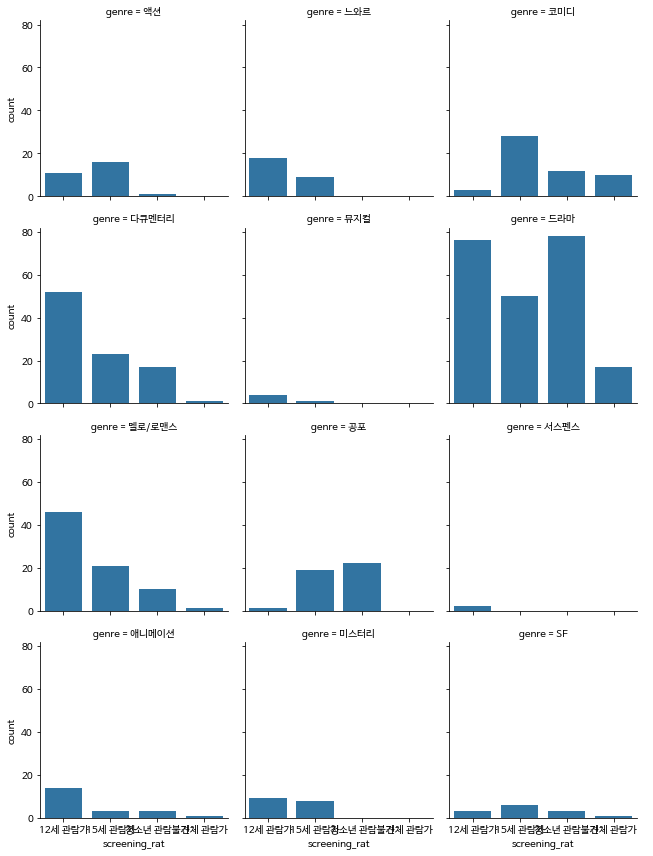

In [ ]:
facet=sns.FacetGrid(train,col='genre',col_wrap=3)
facet=facet.map(sns.countplot, 'screening_rat')
facet=facet.add_legend()

- countplot으로 장르별 상영등급의 비율을 비교하고자 하였으나 장르별로 총 영화 수 자체의 차이가 있어 적절한 비교가 아닌 것으로 보인다. 이에 y축을 frequency로 하는 barchart를 그렸다.

In [ ]:
train.head()
train2=train
train2['value']=1
train_screenrat_relative=train2.groupby(['genre','screening_rat'])['value'].sum()/train2.groupby(['genre'])['value'].sum()
train_screenrat_relative

train_screenratt=train_screenrat_relative.unstack(fill_value=0).stack().reset_index()
train_screenratt.columns=['genre','screening_rat','relative_frequency']
train_screenratt

,genre,screening_rat,relative_frequency
0,SF,12세 관람가,0.2
1,SF,15세 관람가,0.5
2,SF,전체 관람가,0.1
3,SF,청소년 관람불가,0.2
4,공포,12세 관람가,0.0
5,공포,15세 관람가,0.5
6,공포,전체 관람가,0.0
7,공포,청소년 관람불가,0.5
8,느와르,12세 관람가,0.0
9,느와르,15세 관람가,0.3


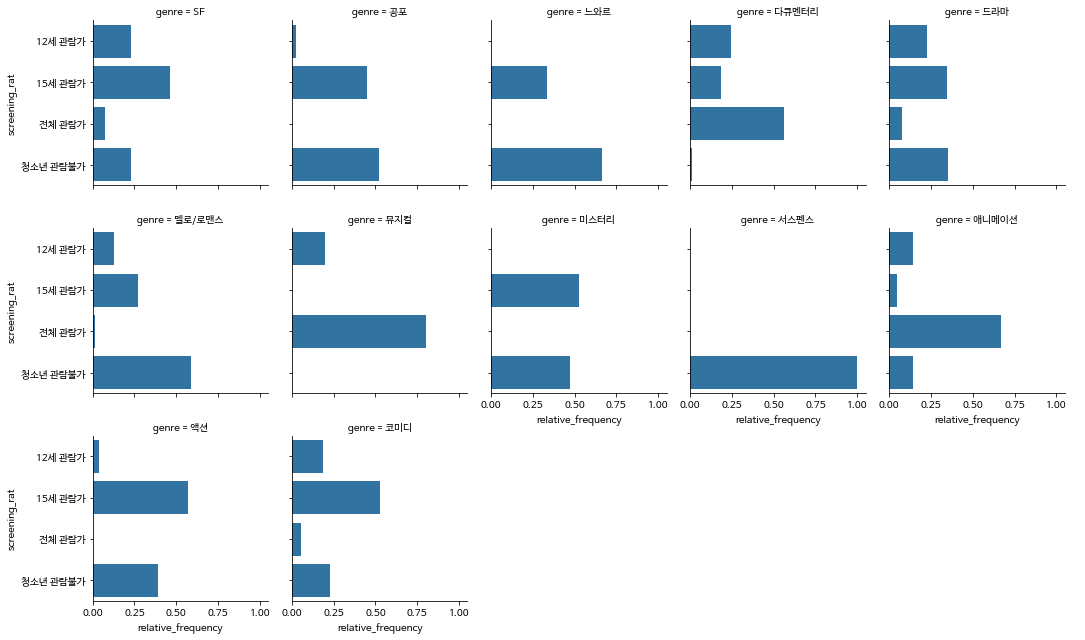

In [ ]:
# 시각화
facet=sns.FacetGrid(data=train_screenratt,col='genre',col_wrap=5,aspect=1)
facet=facet.map(sns.barplot,'relative_frequency','screening_rat')
facet=facet.add_legend()

  * SF, 다큐멘터리, 뮤지컬, 애니메이션, 코미디 장르의 경우 다른 장르들에 비해 청소년 관람불가 등급의 비율이 낮다. 
  * 서스펜스, 공포, 느와르,멜로/로맨스 장르의 경우 청소년관람불가 등급의 비율이 타 등급에 비해 눈에 띄게 높다.
  * 뮤지컬, 애니메이션, 다큐멘터리 장르의 경우 타 장르에 비해 전체 관람가 등급의 비율이 상당히 높다.

## 6-9) 상영등급 별 관객 수
 * 상영 등급 별로 관객 수가 차이가 날 것이라고 생각했다.

In [ ]:
group_by_screeningrat=train.groupby(by='screening_rat')['box_off_num'].mean()
group_by_screeningrat

screening_rat
12세 관람가     844980.9
15세 관람가    1247518.6
전체 관람가      135100.5
청소년 관람불가    364181.3
Name: box_off_num, dtype: float64

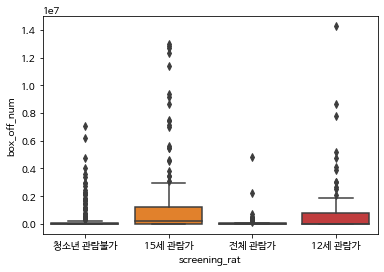

In [ ]:
# 시각화
screeningrat_boxoffnum=plt.subplots()
screeningrat_boxoffnum=sns.boxplot(x='screening_rat', y='box_off_num', data=train)

- 청소년 관람불가 등급과 전체 관람가 등급은 비교적 관객 수가 적었고 15세 관람가, 12세 관람가 등급은 배교적 관객 수가 많았다. 추가적인 설문 등이 필요하겠지만, 다음과 같은 이유일 것이라고 예상된다.  
 - 전체관람가의 경우 재미가 없다고 느끼는 사람이 많아 관객수가 적을 것이다.
  
 - 청소년 관람불가 영화의 경우 내용이 자극적이고 관람 불가 연령의 범위가 가장 크기 때문에 관객 수가 적을 것이다.

## 6-10) 각 감독들은 주로 같은 장르의 영화를 만들었을까?
 * 영화를 제작하는 감독들은 개인 별로 선호하거나 잘 다룰 수 있는 장르가 있을 것이고, 이에 각 감독들이 주로 같은 장르의 영화를 제작할 것이라고 예상하였다.
 * 이를 알아보기 위해 영화를 3편 이상 제작한 감독이 제작한 영화 데이터를 대상으로 분석을 진행하였다.(3편 미만의 영화를 제작한 감독들에 대한 데이터는 경향성을 파악하는데에 있어 의미가 없다고 생각했다.)


In [ ]:
#영화를 일정 수 이상(3편) 제작한 감독 리스트 만들기
train_director=train['director'].value_counts()
train_director.head(10)

train_director_3=train_director[train_director>=3]
train_director_3=pd.DataFrame(train_director_3)
train_director_3name=train_director_3.reset_index()
train_director_3name

director_name=train_director_3name['index']
director_name=np.array(director_name.tolist())
director_name

#3편 이상의 영화를 제작한 감독이 제작한 영화 데이터만 걸러내기
boolean_list=[]
for i in train['director']:
  if i in director_name:
    boolean_list.append(True)
  else:
    boolean_list.append(False)

train_director2=train
train_director2['director2']=boolean_list
train_director2=train[train_director2['director2']]
train_director2=train_director2.reset_index()
train_director2.head(10)

#감독 별로 제작한 영화의 장르별 상대도수 구하기
train_director2['value']=1
train_direc_genre_relative=train_director2.groupby(['director','genre'])['value'].sum()/train2.groupby(['director'])['value'].sum()
train_direc_genre_relative

train_directt_genre=train_direc_genre_relative.unstack(fill_value=0).stack().reset_index()
train_directt_genre.columns=['director','genre','relative_frequency']
train_directt_genre


,director,genre,relative_frequency
0,권칠인,SF,0.0
1,권칠인,공포,0.0
2,권칠인,느와르,0.0
3,권칠인,다큐멘터리,0.0
4,권칠인,드라마,0.7
...,...,...,...
195,홍상수,멜로/로맨스,0.0
196,홍상수,뮤지컬,0.0
197,홍상수,미스터리,0.0
198,홍상수,액션,0.0


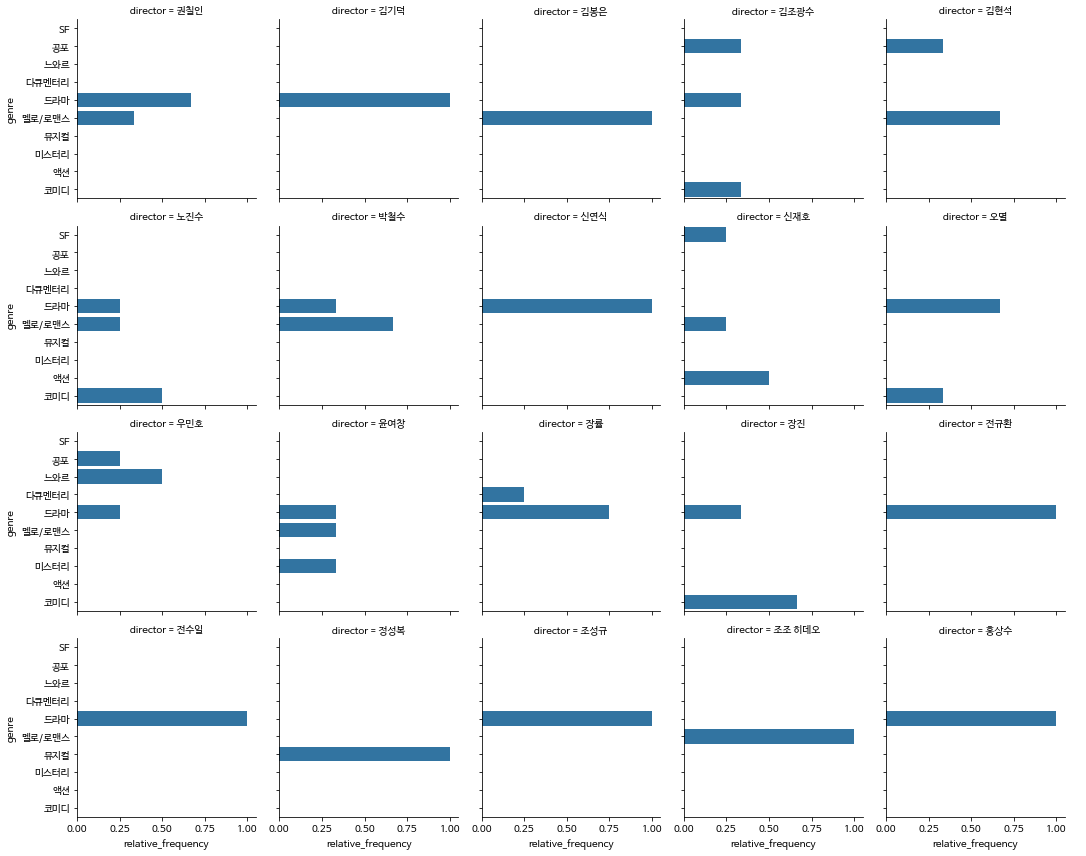

In [ ]:
# 시각화
facet=sns.FacetGrid(data=train_directt_genre,col='director',col_wrap=5,aspect=1)
facet=facet.map(sns.barplot,'relative_frequency','genre')
facet=facet.add_legend()

  * 영화를 3편 이상 제작한 감독 20명 중 9명이 제작한 영화 모두가 하나의 장르에만 속해있다.
  * 영화를 3편 이상 제작한 감독 20명 중 15명이 각 2개 이내 장르의 영화를 제작했다. 
  * 4개 이상 장르의 영화를 제작한 감독은 없다. (최대 3개 장르)
  * 이러한 결과로 미루어 볼 때, 영화를 일정 수 이상 제작한 감독은 주로 같은 장르의 영화를 제작하는 경향이 있음을 알 수 있다. 

## 6-11) 영화를 일정 수 이상 제작한 감독이라면 해당 감독의 영화들은 대부분 같은 배급사일까?
  * 위의 궁금증과 비슷하게 각 감독별로 주로 함께 일하는 배급사가 있을지, 혹은 감독과 영화의 배급사는 연관이 없을지 알아보았다.
  * 위 항목과 같은 이유로 영화를 3편 이상 제작한 감독이 제작한 영화의 데이터만 활용하였으며, 위 항목에서 해당 데이터만 걸러낸 데이터프레임을 그대로 이용하였다.

In [ ]:
#감독 별로 제작한 영화의 배급사별 상대도수 구하기
train_director3=train_director2
train_director3['value']=1
train_direc_dist_relative=train_director3.groupby(['director','distributor'])['value'].sum()/train2.groupby(['director'])['value'].sum()
train_direc_dist_relative

train_directt_dist=train_direc_dist_relative.unstack(fill_value=0).stack().reset_index()
train_directt_dist.columns=['director','distributor','relative_frequency']
train_directt_dist

,director,distributor,relative_frequency
0,권칠인,(주) 영화사조제,0.0
1,권칠인,(주) 영화제작전원사,0.0
2,권칠인,(주) 케이알씨지,0.0
3,권칠인,(주)NEW,0.0
4,권칠인,(주)레인보우 팩토리,0.0
...,...,...,...
655,홍상수,유니버설픽쳐스인터내셔널코리아,0.0
656,홍상수,인디스토리,0.0
657,홍상수,인벤트 디,0.0
658,홍상수,트리필름,0.0


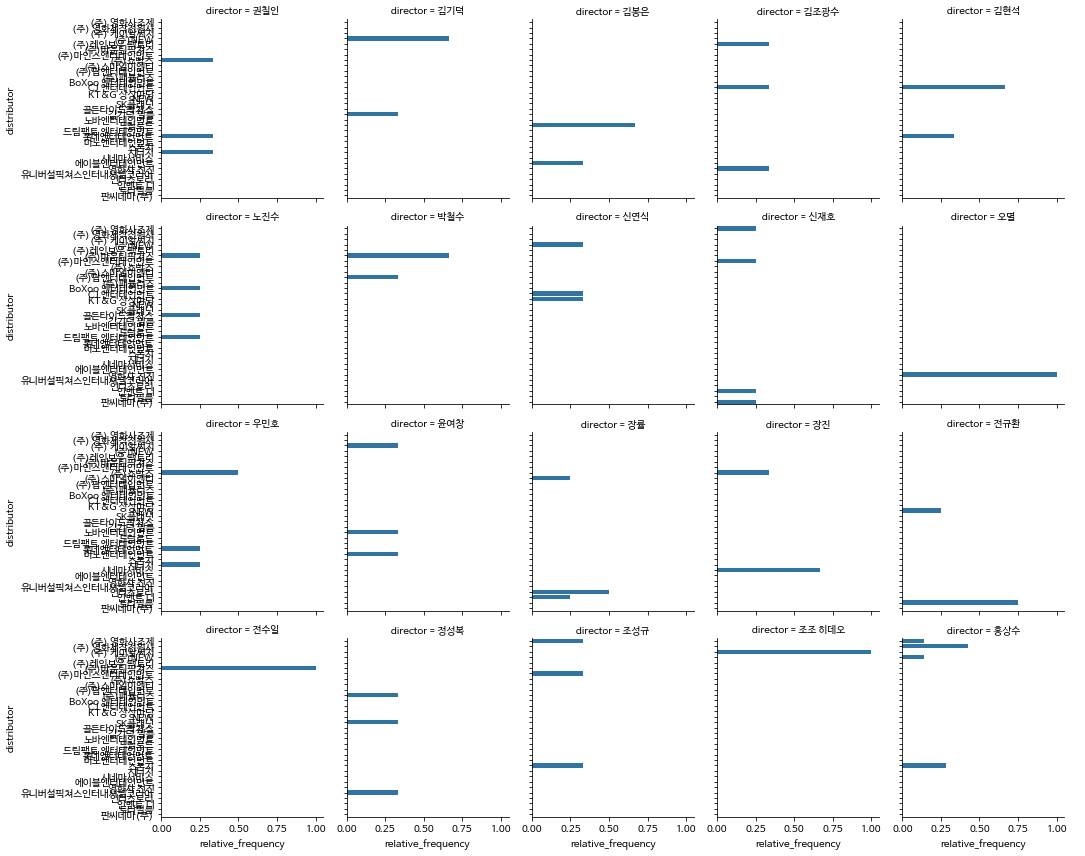

In [ ]:
# 시각화
facet=sns.FacetGrid(data=train_directt_dist,col='director',col_wrap=5,aspect=1)
facet=facet.map(sns.barplot,'relative_frequency','distributor')
facet=facet.add_legend()

  * 대부분의 경우 한 명의 감독이 여러 배급사와 함께 작업하는 듯 하지만, 3명의 감독(오멸, 전수일, 조조히데오)의 경우 특정 배급사와만 꾸준히 작업한 것으로 보인다.

## 6-12) 배급사별 영화 상영 개수와 장르 개수간 상관관계

Text(0, 0.5, '상영한 장르 개수')

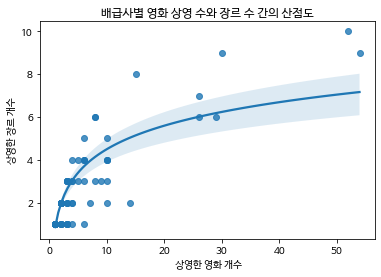

In [ ]:
#배급사별 상영수
movie_count_by_dist = pd.DataFrame(train['distributor'].value_counts())
movie_count_by_dist

def countgenre(list):
  return list.shape[0]
genre_count_by_dist = pd.DataFrame(pd.DataFrame(train.groupby('distributor')['genre'].unique())['genre'].map(countgenre).sort_values())
genre_count_by_dist 


dist_genre = pd.concat([movie_count_by_dist,genre_count_by_dist],axis=1)
dist_genre


ax = plt.subplots()
ax = sns.regplot(dist_genre['distributor'],dist_genre['genre'],logx=True)
ax.set_title('배급사별 영화 상영 수와 장르 수 간의 산점도')
ax.set_xlabel('상영한 영화 개수')
ax.set_ylabel('상영한 장르 개수')

- 상영 수가 많은 배급사일수록 다양한 장르의 영화를 상영했을 것이라고 예상
- 유의미한 양의 상관관계가 존재하므로 상영한 영화 개수가 많은 배급사일수록 다양한 장르의 영화를 상영했다고 볼 수 있음

## 6-13) 감독이 전에 만든 작품 수/흥행도 와 흥행도 (관객수) 사이 관계

Text(0, 0.5, '관객 수')

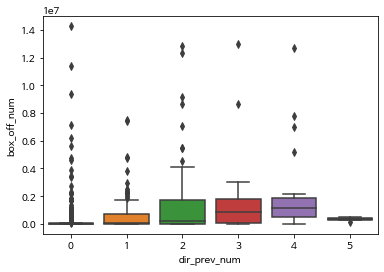

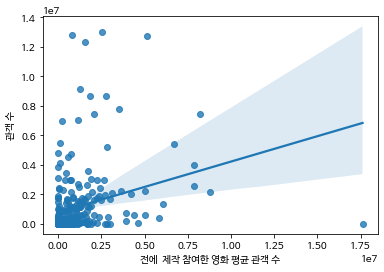

In [ ]:
boxplot=sns.boxplot(x='dir_prev_num', y='box_off_num', data=train)

ax = plt.subplots()
ax = sns.regplot(train['dir_prev_bfnum'],train['box_off_num'])
ax.set_title('')
ax.set_xlabel('전에 제작 참여한 영화 평균 관객 수')
ax.set_ylabel('관객 수')

- 큰 상관관계가 있어보이지 않는다.

## 6-14) 장르별 월별 관객수 추이

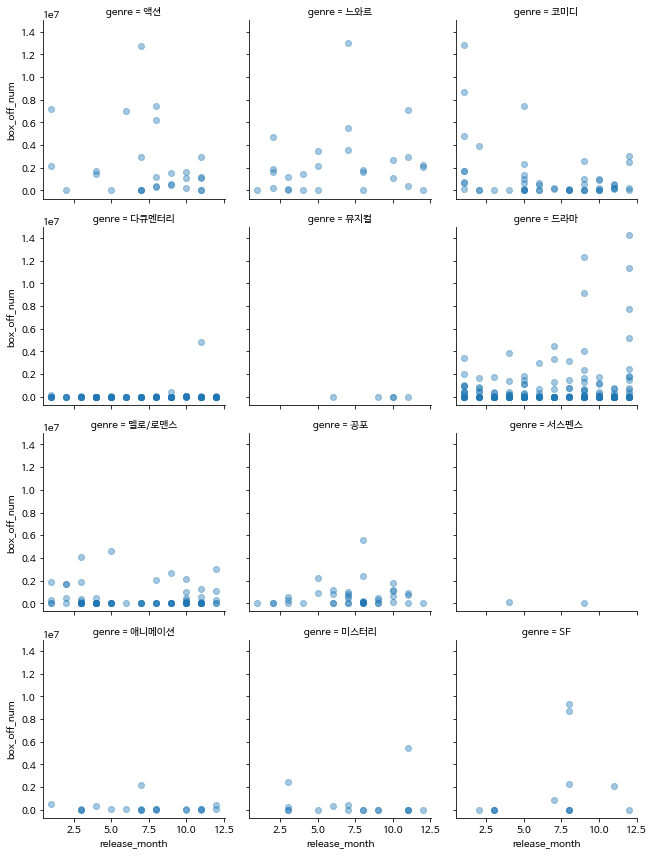

In [ ]:
facet = sns.FacetGrid(train, col='genre',col_wrap=3)
facet = facet.map(plt.scatter,'release_month','box_off_num', alpha=0.4)
facet = facet.add_legend()